In [24]:
import pandas as pd
import numpy as np
import glob 
from os.path import join
import ntpath
import os
from collections import defaultdict
import math
import matplotlib.pyplot as plt

from matplotlib import rcParams
%matplotlib inline

In [25]:
def get_sampling_dirs(a_dir):
    return [filename for filename in glob.glob(join(a_dir,'*/PCAP-03-11_l'))]    

In [26]:
def get_nids_time(d):
    df = pd.read_csv(join(d,'timing.csv'),dtype={'Records':int,'Time':float})    
    return df['Time'][0]

def get_nids_records(d):
    df = pd.read_csv(join(d,'timing.csv'),dtype={'Records':int,'Time':float})    
    return df['Records'][0]

In [27]:
def extract_sampler_names(dir_names):
    sampler_names = []
    for dir_name in dir_names:
        if 'SFS' in dir_name:
            label = 'SketchFlow Sampling'
        elif 'SGS' in dir_name:
            label = 'Sketch Guided Sampling'
        elif 'RPS' in dir_name:
            label = 'Random Packet Sampling'
        elif 'FFS' in dir_name:
            label = 'Fast Filtered Sampling'
        elif 'SEL' in dir_name:
            label = 'Selective Flow Sampling'
        elif 'without_sampling_l' in dir_name:
            label = 'Without Sampling'
        else:
            print('Investigate plot_comparison',dir_name)
            
        sampler_names.append(label)
    return sampler_names

In [31]:
roots = ['/data/juma/data/ddos/CSVs_r_1.0/SR_10/',
         '/data/juma/data/ddos/CSVs_r_0.1/SR_10/',
         '/data/juma/data/ddos/CSVs_r_0.01/SR_10/',
        '/data/juma/data/ddos/CSVs_r_0.001/SR_10/',
        '/data/juma/data/ddos/CSVs_r_0.0001/SR_10/',
        '/data/juma/data/ddos/CSVs_r_1e-05/SR_10/'
        ]

#classifier_fingerprint = 'r_1_c_cnn_k_5_optim_Adam_lr_0.001_reg_0_bs_256_b_explicit'
inference_time_d = defaultdict(list)
sampler_names = None
for root in roots:
    sampling_dirs = get_sampling_dirs(root)
    sampler_names = extract_sampler_names(sampling_dirs)   
    #inference_times = [get_nids_time(join(d,classifier_fingerprint)) for d in sampling_dirs]
    inference_times = [get_nids_time(d) for d in sampling_dirs]
    print(root)
    print(inference_times)
    print(sampler_names)
    print('---------------------')
    for i,name in enumerate(sampler_names): 
        inference_time_d[name].append(inference_times[i])
        

/data/juma/data/ddos/CSVs_r_1.0/SR_10/
[53.30856323242188, 78.5204918384552, 68.09109425544739, 62.82415413856506, 70.85068535804749]
['Sketch Guided Sampling', 'Random Packet Sampling', 'Fast Filtered Sampling', 'Selective Flow Sampling', 'SketchFlow Sampling']
---------------------
/data/juma/data/ddos/CSVs_r_0.1/SR_10/
[53.96902823448181, 73.48238945007323, 64.82283639907837, 65.88552236557007, 74.57471632957457]
['Sketch Guided Sampling', 'Random Packet Sampling', 'Fast Filtered Sampling', 'Selective Flow Sampling', 'SketchFlow Sampling']
---------------------
/data/juma/data/ddos/CSVs_r_0.01/SR_10/
[54.670178651809685, 77.80065417289735, 67.54097747802734, 68.48335528373718, 74.10276007652283]
['Sketch Guided Sampling', 'Random Packet Sampling', 'Fast Filtered Sampling', 'Selective Flow Sampling', 'SketchFlow Sampling']
---------------------
/data/juma/data/ddos/CSVs_r_0.001/SR_10/
[54.12430787086487, 67.29989266395569, 66.57187485694885, 66.08004689216614, 77.52620100975038]
['Sk

Sketch Guided Sampling [53.30856323242188, 53.96902823448181, 54.670178651809685, 54.12430787086487, 55.034703731536865, 55.42534923553467]
Random Packet Sampling [78.5204918384552, 73.48238945007323, 77.80065417289735, 67.29989266395569, 76.83851122856142, 82.71049094200134]
Fast Filtered Sampling [68.09109425544739, 64.82283639907837, 67.54097747802734, 66.57187485694885, 71.12695384025574, 76.98334336280824]
Selective Flow Sampling [62.82415413856506, 65.88552236557007, 68.48335528373718, 66.08004689216614, 65.69608354568481, 67.08547282218933]
SketchFlow Sampling [70.85068535804749, 74.57471632957457, 74.10276007652283, 77.52620100975038, 70.21259093284607, 71.37296128273009]



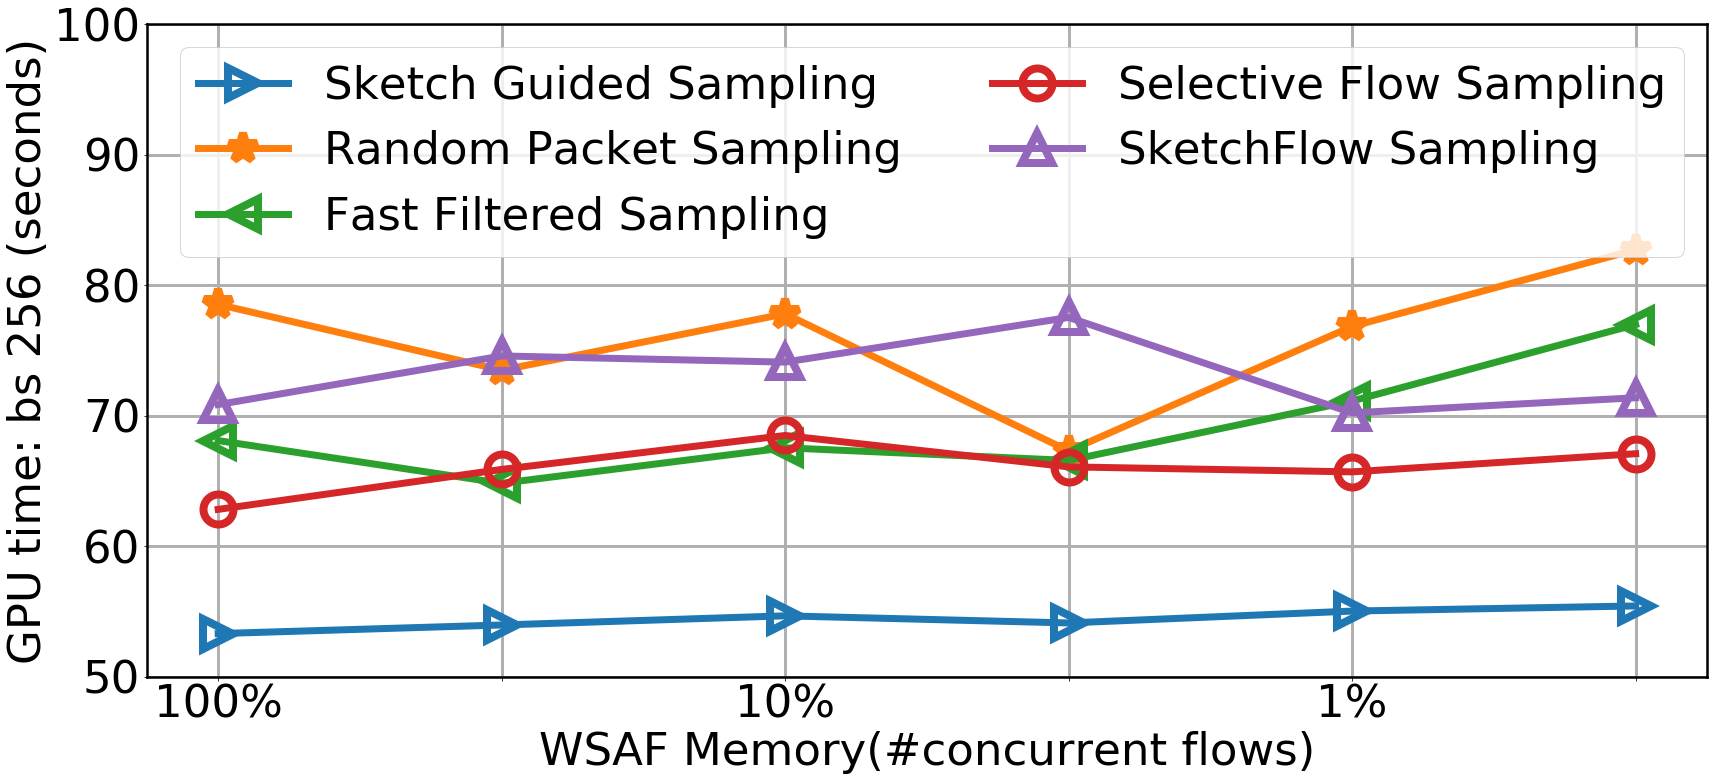

In [33]:
#drawing
N = len(roots)
ind = np.arange(N)
font = {'size'   : 45}
plt.rc('font', **font)
plt.rcParams["axes.linewidth"]  = 2.5
fig, ax = plt.subplots(nrows=1,ncols=1,sharex=False,figsize=(25,12))
markers = ['>','*','<','o','^']
for i,name in enumerate(sampler_names):
    print(sampler_names[i],inference_time_d[name])
    ax.plot(ind,inference_time_d[name],label=sampler_names[i],linewidth=7,marker=markers[i],markersize=30,markeredgewidth=8,markerfacecolor='none')
print()
plt.grid(linewidth=3)

plt.ylabel('GPU time: bs 256 (seconds)')
plt.xlabel('WSAF Memory(#concurrent flows)')
#plt.yscale('log')
ax.set_xticklabels(['','100%','','10%','','1%','','0.1%','','0.01%'])
ax.set_ylim(50,100)
fig.tight_layout()
#ax.legend(bbox_to_anchor=(1., 1.01))
plt.legend(ncol=2)
plt.savefig('/data/juma/data/ddos/memory_effect_nids_time.png', bbox_inches='tight',dpi=100)
plt.show()

/data/juma/data/ddos/CSVs_r_1.0/SR_10/
[4427357, 4537081, 4434439, 3966133, 4708891]
---------------------
/data/juma/data/ddos/CSVs_r_0.1/SR_10/
[4501027, 4639699, 4530285, 4042546, 4816968]
---------------------
/data/juma/data/ddos/CSVs_r_0.01/SR_10/
[4592512, 4917087, 4808765, 4098445, 5086807]
---------------------
/data/juma/data/ddos/CSVs_r_0.001/SR_10/
[4600403, 4935378, 4829461, 4104708, 5118263]
---------------------
/data/juma/data/ddos/CSVs_r_0.0001/SR_10/
[4643992, 5112868, 5032517, 4120201, 5174975]
---------------------
/data/juma/data/ddos/CSVs_r_1e-05/SR_10/
[4661139, 5135832, 5054082, 4137330, 5200303]
---------------------
Sketch Guided Sampling [53.30856323242188, 53.96902823448181, 54.670178651809685, 54.12430787086487, 55.034703731536865, 55.42534923553467]
Random Packet Sampling [78.5204918384552, 73.48238945007323, 77.80065417289735, 67.29989266395569, 76.83851122856142, 82.71049094200134]
Fast Filtered Sampling [68.09109425544739, 64.82283639907837, 67.54097747

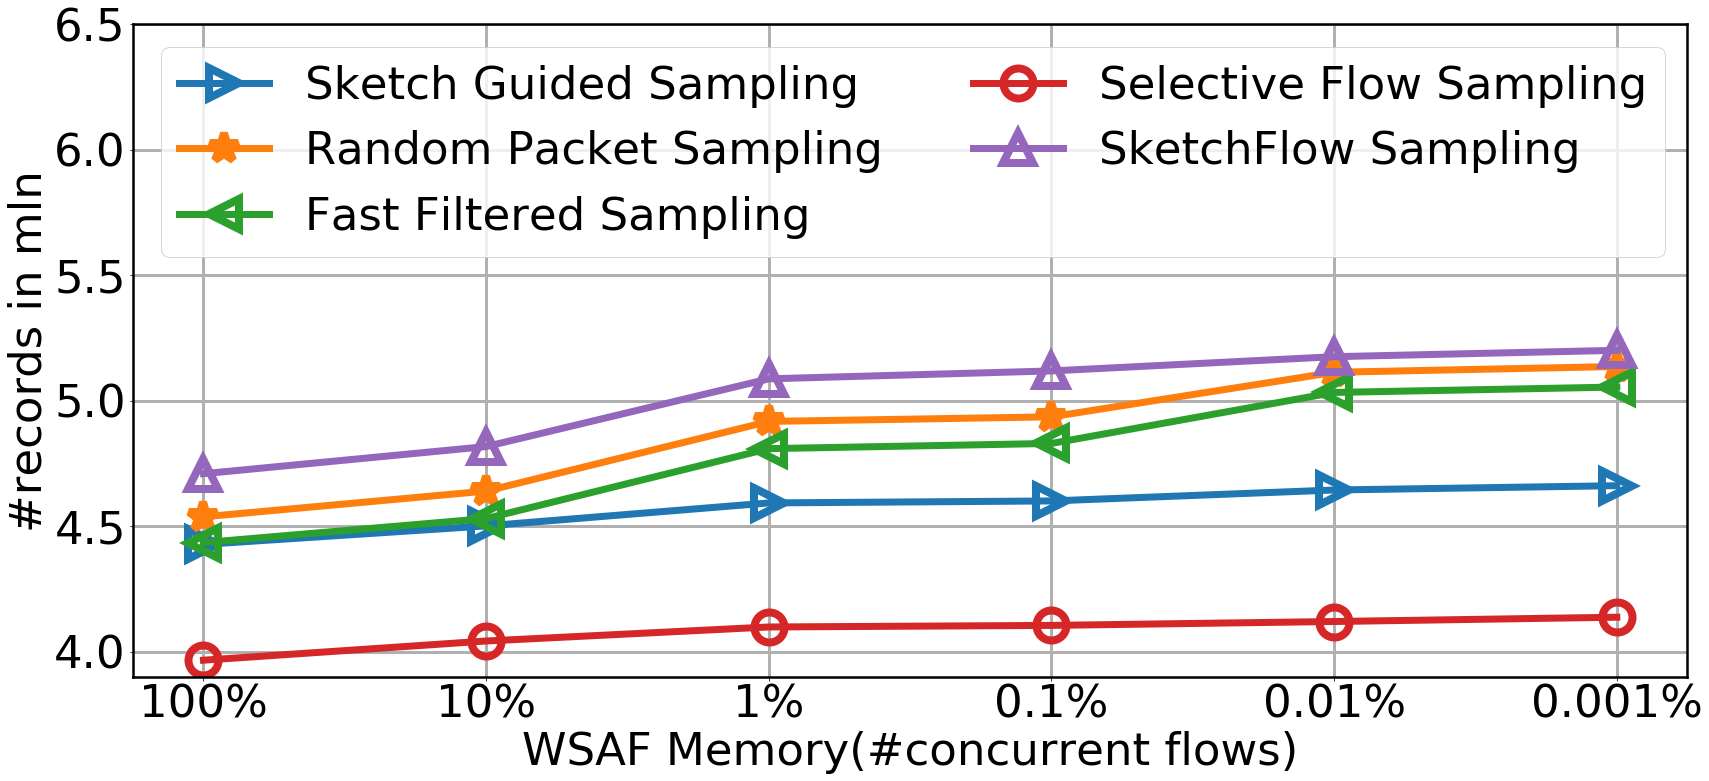

In [30]:
roots = ['/data/juma/data/ddos/CSVs_r_1.0/SR_10/',
         '/data/juma/data/ddos/CSVs_r_0.1/SR_10/',
         '/data/juma/data/ddos/CSVs_r_0.01/SR_10/',
        '/data/juma/data/ddos/CSVs_r_0.001/SR_10/',
        '/data/juma/data/ddos/CSVs_r_0.0001/SR_10/',
        '/data/juma/data/ddos/CSVs_r_1e-05/SR_10/'
        ]

#classifier_fingerprint = 'r_1_c_cnn_k_5_optim_Adam_lr_0.001_reg_0_bs_256_b_explicit'
record_count_d = defaultdict(list)
mln = 10**6
sampler_names = None
for root in roots:
    sampling_dirs = get_sampling_dirs(root)
    sampler_names = extract_sampler_names(sampling_dirs)   
    #inference_times = [get_nids_time(join(d,classifier_fingerprint)) for d in sampling_dirs]
    record_counts = [get_nids_records(d) for d in sampling_dirs]
    print(root)
    print(record_counts)
    #print(sampler_names)
    print('---------------------')
    for i,name in enumerate(sampler_names): 
        record_count_d[name].append(record_counts[i]/mln)
        
        
#drawing
N = len(roots)
ind = np.arange(N)
font = {'size'   : 45}
plt.rc('font', **font)
plt.rcParams["axes.linewidth"]  = 2.5
fig, ax = plt.subplots(nrows=1,ncols=1,sharex=False,figsize=(25,12))
markers = ['>','*','<','o','^']
for i,name in enumerate(sampler_names):
    print(sampler_names[i],inference_time_d[name])
    ax.plot(ind,record_count_d[name],label=sampler_names[i],linewidth=7,marker=markers[i],markersize=30,markeredgewidth=8,markerfacecolor='none')
print()
plt.grid(linewidth=3)

plt.ylabel('#records in mln')
plt.xlabel('WSAF Memory(#concurrent flows)')
#plt.yscale('log')
ax.set_xticklabels(['','100%','10%','1%','0.1%','0.01%','0.001%'])
ax.set_ylim(3.9,6.5)
fig.tight_layout()
#ax.legend(bbox_to_anchor=(1., 1.01))
plt.legend(ncol=2)
plt.savefig('/data/juma/data/ddos/memory_effect_nids_time.png', bbox_inches='tight',dpi=100)
plt.show()